## CHAPTER3. 신경망

#### 퍼셉트론 장단점 
- 장점:복잡한 함수 표현가능 
 
- 단점: 가중치 설정 작업을 사람이 해야함

###  3.1 퍼셉트론에서 신경망으로

- 퍼셉트론과 유사한 신경망 모습
- 맨 왼쪽 입력층 맨 우측 출력층 중간 줄 은닉층 (0 ~ 2 층과 유사)
- 가중치를 가지는 것은 2개뿐이기에 2층 신경망이라 불림 


![그림1](http://m1.daumcdn.net/cfile232/R400x0/2018CF4B4FA6578E273027)
![그림3](http://cfile21.uf.tistory.com/image/2636303E5928022114E5EA)
![그림4](http://cfile5.uf.tistory.com/image/2771253D592802F526AAEA)
- 기존 퍼셉트론 구조 복습 
![그림2](http://cfile29.uf.tistory.com/image/2428913E59280221279FE9)
![그림5](http://cfile9.uf.tistory.com/image/2169163D59280409224992)

- 기존 퍼셉트론과 다른 점은 편향을 명시하였다는것 
- h(x) 라는 활성화 함수 등장 : 입력 신호의 총합이 활성화를 일으키는 지 결정 -> 1. 총합을 구하는 과정 2. 활성화 함수에 집어넣는과정으로 바뀐 것 
- 뉴런과 노드는 동의어로 사용하겠다

### 3.2 활성화 함수

#### 1. 시그모이드 함수
![그림6](http://cfile27.uf.tistory.com/image/2458953F592805C11825F5)
- 임계값을 경계로 출력이 바뀌는 함수 : 계단 함수

In [8]:
# 계단 함수 구현
def step_funtion(x):
    if x > 0:
        return 1
    else:
        return 0
# 이 함수는 넘파이 배열을 인수로 지정할 수 없다.

In [18]:
# 넘파이를 이용하자
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [12]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [14]:
y = x >0
y   #  논리 연산을 거치면 불리언 값을 반환한다. 

array([False,  True,  True], dtype=bool)

In [15]:
y =  y.astype(np.int) # 다시 0, 1 로 반환
y

array([0, 1, 1])

#### 계단함수 그래프 그리기

In [16]:
import matplotlib.pylab as plt

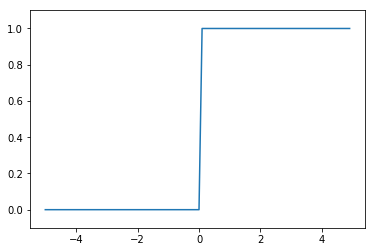

In [28]:
def step_function(x):
    return np.array(x > 0 , dtype =  np.int)
x =  np.arange(-5.0 , 5.0 , 0.1 ) # -5 ~ 5까지 0.1 간격으로 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정 
plt.show()  # 그림에서 보듯 0을 경계로 출력이 0에서 1로 바뀐다. 

#### 시그모이드 함수 구현

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [35]:
x = np.arange(-5.0, 5.0 , 0.1)

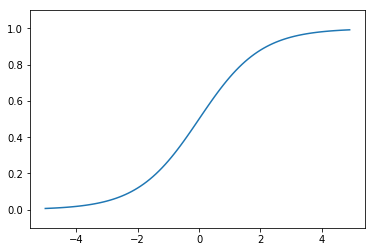

In [36]:
x = np.arange(-5.0, 5.0 , 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 계단함수와 시그모이드함수
- 공통점 0~ 1 값을 가진다.  /  비선형 함수이다. 
- 차이점 매끄러움의 차이

- 활성화 함수로는 비선형 함수를 사용해야한다. ex) h(x)= cx 라면 3층 네트워크를 해도 c^3 한것에 불과하기 때문

### RELU 함수

- 입력이 0을 넘으면 입력을 그대로 출력하고 0이하이면 0을 출력하는 함수

In [41]:
def relu(x):
    return np.maximum(0,x) # maxium 은 둘중 큰 값을 반환하는 함수

#### 다차원 배열


In [42]:
A = np.array([1,2,3,4]) # 1차원 배열 생성
np.dim(A) # 차원 보기
A.shape # A배열의 형상을 튜플로 반환


array([1, 2, 3, 4])

In [47]:
B = np.array([[1,2],[3,4],[5,6]])
B


array([[1, 2],
       [3, 4],
       [5, 6]])

In [48]:
np.ndim(B)

2

In [49]:
B.shape

(3, 2)

#### 행렬의 내적 dot

In [52]:
A = np.array([[1,2],[3,4]])
B = np.array([[-1,-2],[-3,-4]])
np.dot(A,B)


array([[ -7, -10],
       [-15, -22]])

### 3층 신경망 구현

#### 1. 입력층에서 1층으로 신호 전달 
A(1) = XW(1) + B(1)

In [56]:
X = np.array([1.0 , 0.5])
W1 = np.array([[0.1 , 0.3 , 0.5], [0.2 , 0.4 ,0.6]])
B1 = np.array([0.1, 0.2, 0.3])
# 배열 생성
# 신호전달 계산
A1 = np.dot(X, W1) + B1

In [59]:
Z1 = sigmoid(A1) # 활성화 함수
A1 , Z1

(array([ 0.3,  0.7,  1.1]), array([ 0.57444252,  0.66818777,  0.75026011]))

#### 2.   1층에서 2층으로 신호 전달

In [61]:
# 같은 방식으로 실행 
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [63]:
# 항등함수 정의
def identify_function(x):
    return x

#### 3. 2층에서 출력층으로 

In [65]:
W3 = np.array([[0.1, 0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3) # 항등 함수 사용

#### 회귀에는 항등 함수를 분류에는 소프트 맥스 함수를 사용

![그림5](http://cfile29.uf.tistory.com/image/220C773B593E518207E9F3)
- 수식에서 알 수있는 오버플로(Inf) 문제 발생하여 C'를 이용하는 것 (입력신호 중 최댓값을 이용)

In [70]:
# 오버플로 대책 세운 소프트맥스
def softmax(a):
    c = np.max(a)  # C 정의
    exp_a  = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [71]:
# 소프트 맥스 함수의 특징
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 0.01821127  0.24519181  0.73659691]


1.0

-  합이 1 이다. 확률 성질을 이용할 수 있겠다.
- 현업에서는 지수 함수계산 낭비 중리고자 소프트맥스 함수 생략

### MNIST 데이터 이용

In [102]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('__file__'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_ont_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_ont_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_ont_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


### mnist실습 추후 시행해보기